In [40]:
import numpy as np
from sklearn.decomposition import NMF
from scipy import optimize, ndimage
import copy
import matplotlib.pyplot as plt
import random

In [41]:
def unit_vector_norm(X):
    X -= X.min() #remove noise offset
    return (X.T / np.sqrt((X**2).sum(axis=1))).T

def blur_norm(X, s):
    return ndimage.gaussian_filter(X, (s,s,0))

In [42]:
# use 368 to 1750
N_WAVE = 700
s = 1
start_index, end_index = 115, 815

X = np.load("../data/HSI/Liver_map_150z25_60s_1TCPOBOP.npy", 'r')[:,:,start_index: end_index]
Y = np.load("../data/HSI/Liver_map_150z25_60s_2TCPOBOP.npy", 'r')[:,:,start_index: end_index]
Z = np.load("../data/HSI/Liver_map_150z25_60s_3OBOB.npy", 'r')[:,:,start_index: end_index]
wavelength = np.load("../data/HSI/wavelength.npy", 'r')[start_index: end_index]

shape_X = X.shape 
shape_Y = Y.shape 
shape_Z = Z.shape 

X = copy.copy(X.reshape(-1, X.shape[-1]))
Y = copy.copy(Y.reshape(-1, Y.shape[-1]))
Z = copy.copy(Z.reshape(-1, Z.shape[-1]))

In [67]:
def new_method(X):
    X = unit_vector_norm(X)

    v = 3
    nmf = NMF(v)
    W = nmf.fit_transform(X)
    H = nmf.components_
    ((W @ H - X)**2).mean(1).mean()

    w = W / W.max()
    plt.figure(figsize = (20,4))
    plt.imshow(np.swapaxes(w.reshape((*shape_X[:2], v)),0,1)[::-1,:,:3])
    plt.show()

    plt.figure(figsize = (20,12))
    for h in H:
        plt.plot(wavelength, h)
    plt.title("reference vectors used in the NNMF")
    plt.show()
    
    i = random.randint(0, 3750)
    plt.figure(figsize = (20,12))
    plt.plot(wavelength, W[i,:] @ H, label='rec')
    plt.plot(wavelength, X[i,:], label='org')
    plt.legend()
    plt.title("Random reconstruction of 1 pixel")
    plt.show()
    
    plt.figure(figsize = (20,12))
    weighted_sum = W.sum(0)
    for i, x in enumerate(W.T @ X):
        plt.plot(wavelength, x / weighted_sum[i])   
    plt.title("reference vector based on weighted mean of clusters")
    plt.show()
    

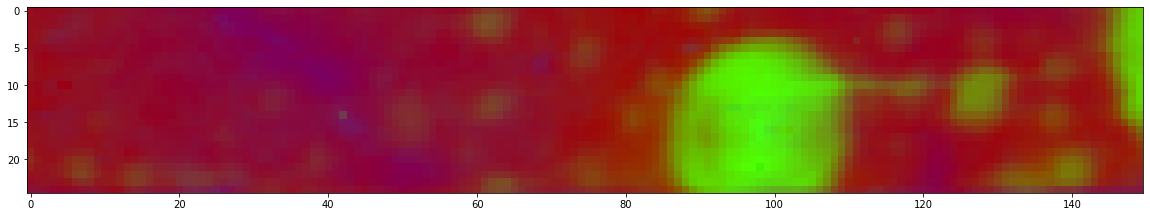

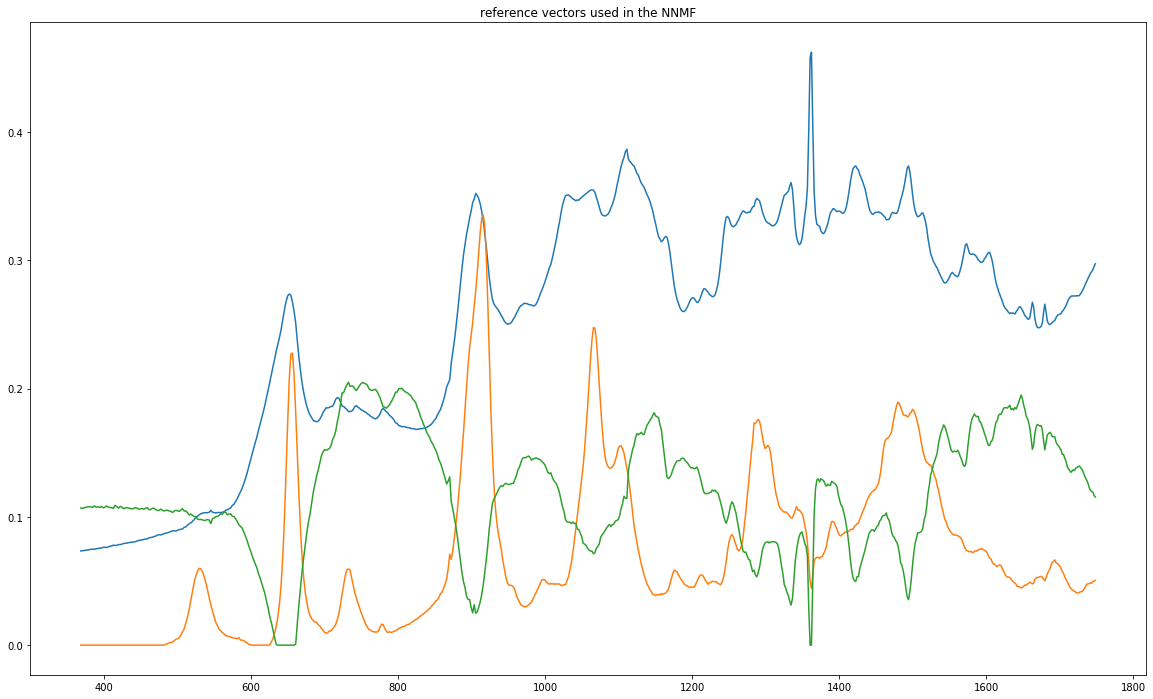

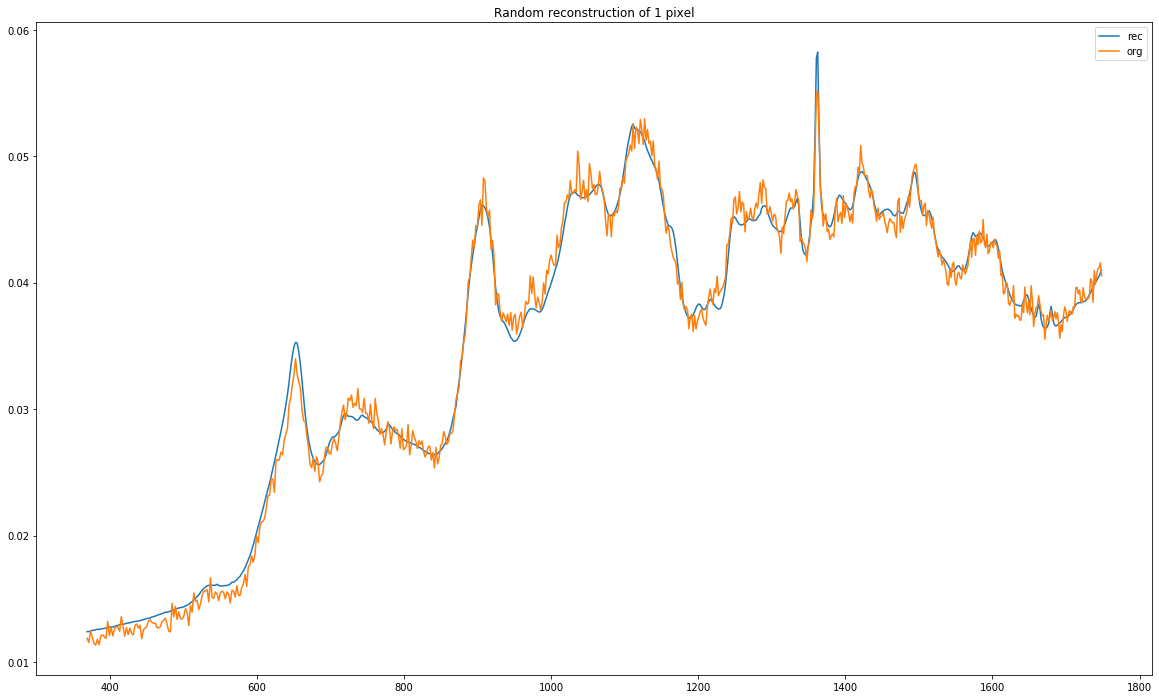

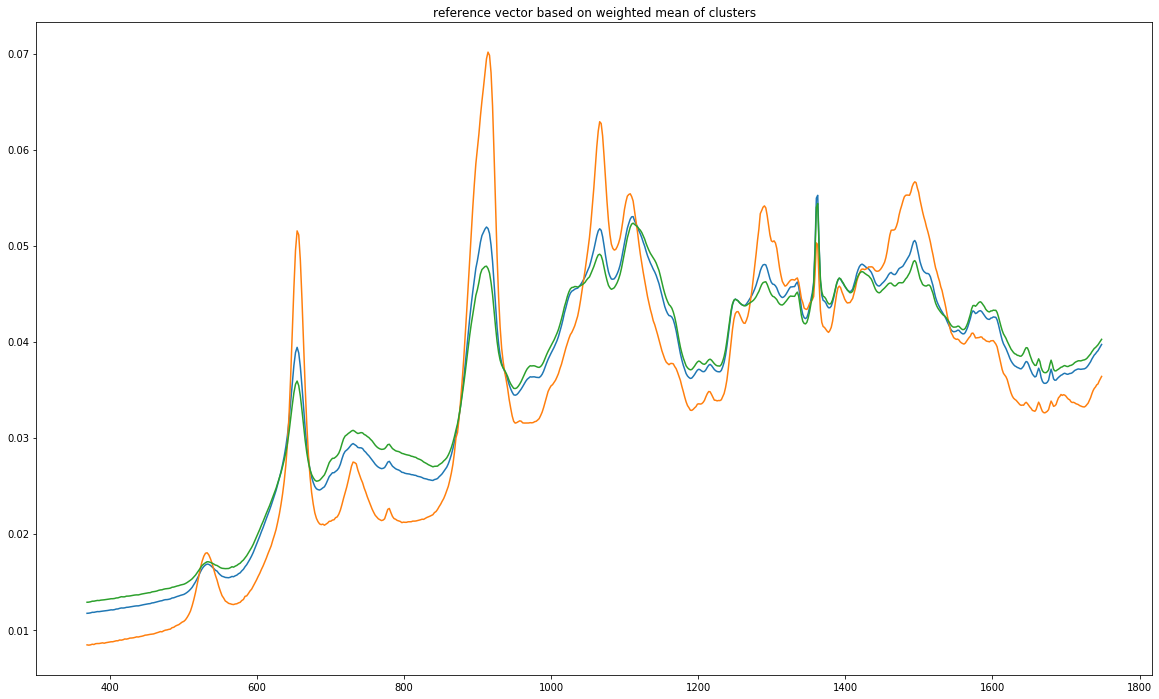

In [68]:
new_method(X)

(3750, 3)


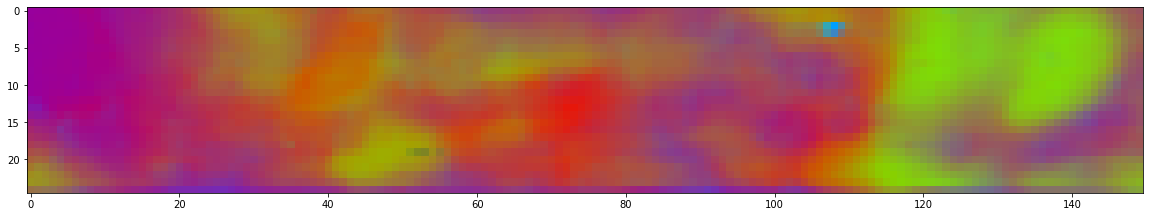

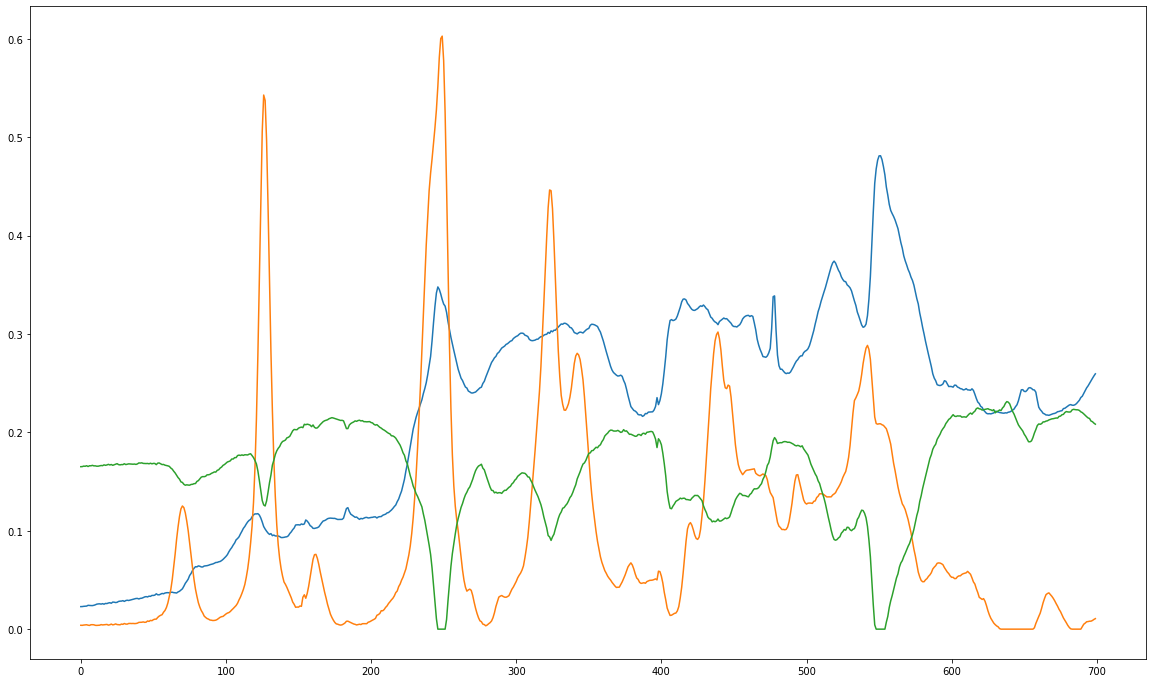

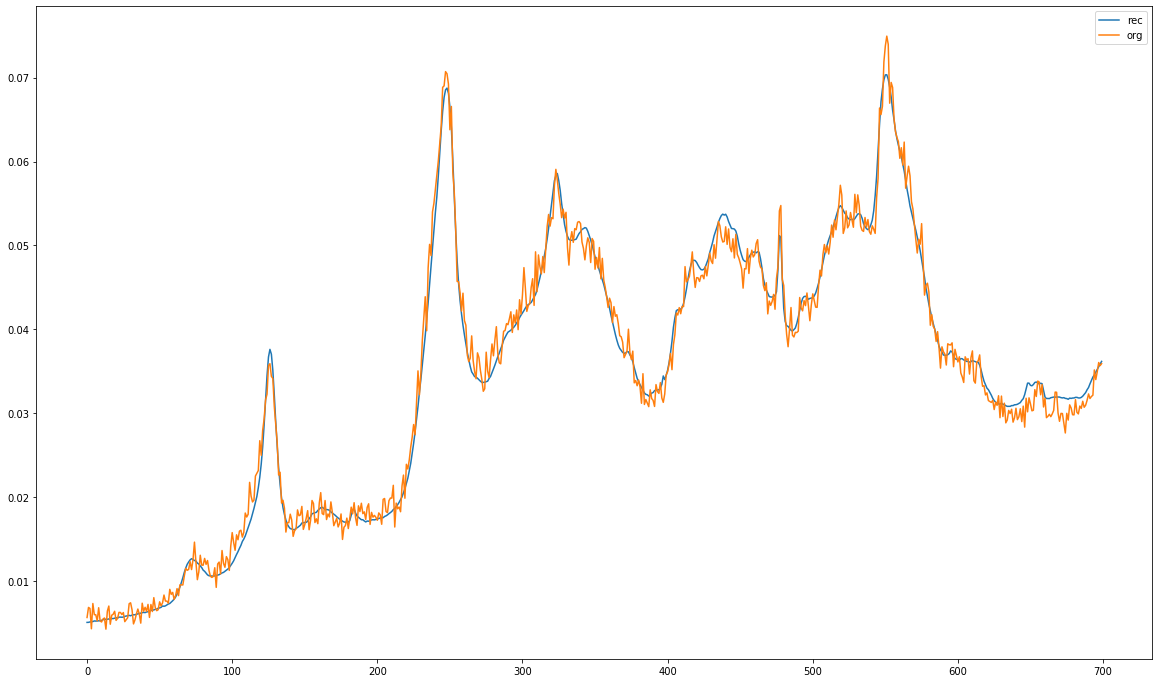

In [47]:
new_method(Y)

(3750, 3)


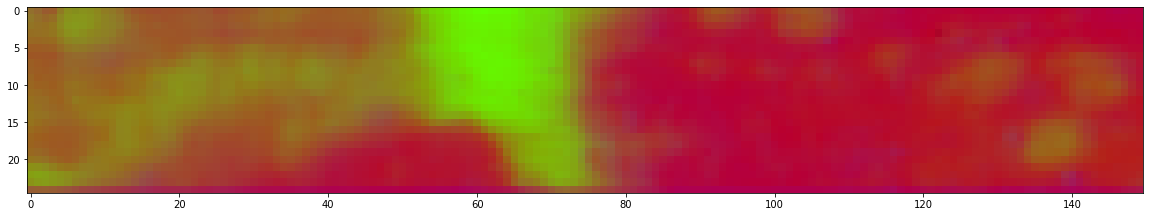

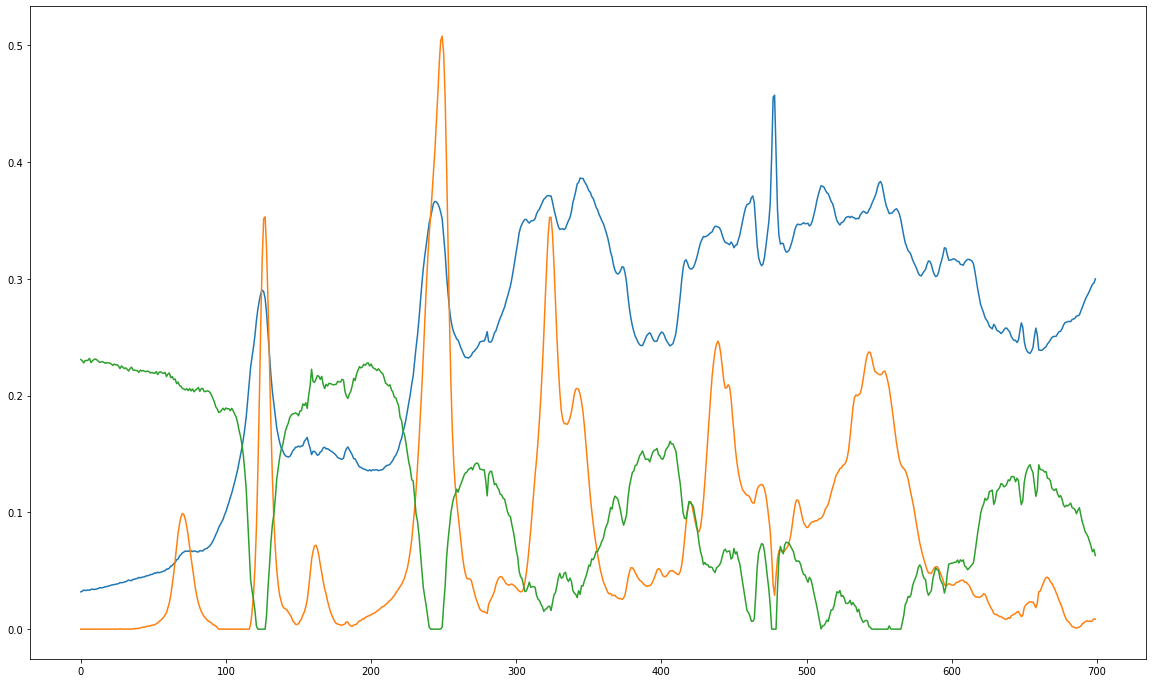

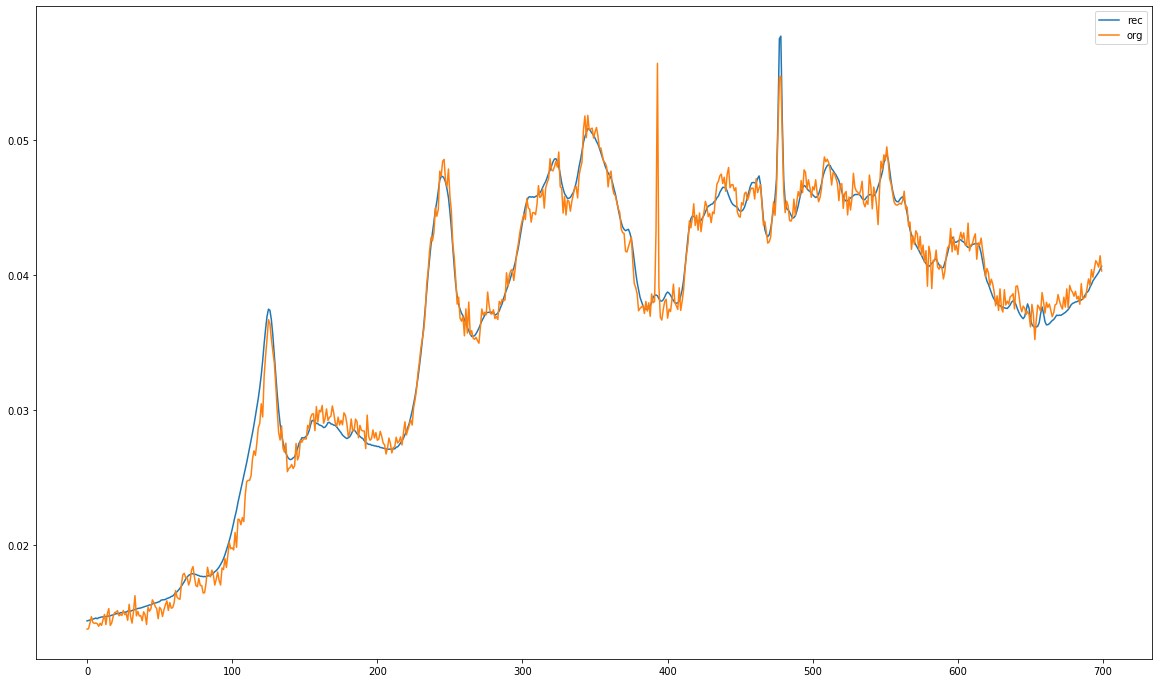

In [48]:
new_method(Z)